<a href="https://colab.research.google.com/github/bingjun5249/bootcamp/blob/main/Wbosonreconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uproot3
!pip install uproot_methods
!pip install mplhep

     |████████████████████████████████| 122kB 8.0MB/s 
     |████████████████████████████████| 92kB 5.1MB/s 
     |████████████████████████████████| 92kB 5.4MB/s 
     |████████████████████████████████| 5.5MB 7.3MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import uproot3 as ROOT
import uproot_methods as ROOT_methods
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
import mplhep as hep

In [ ]:
# root파일 불러오기
tree = ROOT.open("/content/drive/MyDrive/rootfiles/p p > t t~/ttbar_1l.root")["Delphes"]

In [ ]:
# 정보 불러오기
elec_pt = tree["Electron.PT"].array()
elec_eta = tree["Electron.Eta"].array()
elec_phi = tree["Electron.Phi"].array()

met_pt = tree["MissingET.MET"].array()
met_eta = tree["MissingET.Eta"].array()
met_phi = tree["MissingET.Phi"].array()

In [ ]:
# 평평하게 만들기
met_pt = met_pt.flatten()
met_phi = met_phi.flatten()

In [ ]:
# transverse mass 계산

tvmass_elec = []

for i in range(len(elec_pt)):
  if elec_pt.counts[i] > 0:
    tvmass_elec.append(np.sqrt(2*elec_pt[i,0]*met_pt[i]*(1. - np.cos(elec_phi[i,0]-met_phi[i]))))

print(len(tvmass_elec))

4781


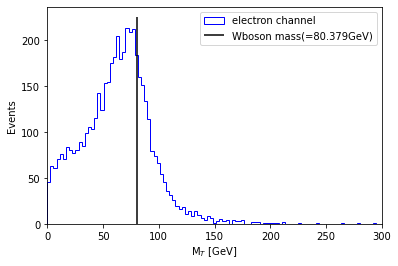

In [ ]:
# 히스토그램 그리기
plt.hist(tvmass_elec, bins=150, color='blue', histtype='step', label='electron channel')
plt.vlines(80.379,0,225,label='Wboson mass(=80.379GeV)')
plt.xlim(0,300)
plt.xlabel("M$_{T}$ [GeV]")
plt.ylabel("Events")
plt.legend()
plt.show()